In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [458]:
df = pd.read_csv('laptopPrice.csv')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [459]:
## Features selection(imp step)
cat_col = df.drop(["brand","os_bit",],axis=1)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [460]:
# to seperate the catagorical column
cat_col = cat_col.select_dtypes(include="O")
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [461]:
# to seperate the numerical column
num_col = df.select_dtypes(exclude="O")
num_col.head()

,Price,Number of Ratings,Number of Reviews
0,34649,3,0
1,38999,65,5
2,39999,8,1
3,69990,0,0
4,26990,0,0


In [462]:
pd.get_dummies(cat_col).astype(int).head()

,processor_brand_AMD,processor_brand_Intel,processor_brand_M1,processor_name_Celeron Dual,processor_name_Core i3,processor_name_Core i5,processor_name_Core i7,processor_name_Core i9,processor_name_M1,processor_name_Pentium Quad,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,0,1,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0


In [463]:
cat_col["processor_brand"].value_counts()

processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64

In [464]:
dt1 = {
    "Intel" :   1,
"AMD" :     2,
"M1"  :      3
}

In [465]:
cat_col["processor_brand"] = cat_col["processor_brand"].map(dt1)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,1,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,1,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [466]:
cat_col["processor_name"].value_counts()

processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

In [467]:
dt2 = {
"Core i5" :        1,
"Core i3"  :       2,
"Core i7"  :      3,
"Ryzen 5"  :       4,
"Ryzen 7"  :       5,
"Ryzen 3"  :       6,
"Ryzen 9"  :       7,
"Celeron Dual" :    8,
"M1"           :   9,
"Pentium Quad"  :   10,
"Core i9"      :   11
}

In [468]:
cat_col["processor_name"] = cat_col["processor_name"].map(dt2)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,1,2,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,1,2,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,1,1,10th,8 GB,DDR4,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,1,8,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [469]:
cat_col["processor_gnrtn"].value_counts()

processor_gnrtn
11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [470]:
dt3 = {
    "11th"  :       11,
"Not Available" :   0,
"10th"          :  10,
"8th"           :   8,
"7th"           :    7,
"9th"           :    9,
"12th"          :    12,
"4th"           :    4,
}

In [471]:
cat_col["processor_gnrtn"] = cat_col["processor_gnrtn"].map(dt3)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,1,2,10,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,1,2,10,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,1,1,10,8 GB,DDR4,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,1,8,0,4 GB,DDR4,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [472]:
cat_col["ram_gb"].value_counts()

ram_gb
8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: count, dtype: int64

In [473]:
dt4 = {
    "8 GB" :    8,
"4 GB"  :   4,
"16 GB" :  16,
"32 GB" :    32
}

In [474]:
cat_col["ram_gb"] = cat_col["ram_gb"].map(dt4)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,1,2,10,4,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,1,2,10,4,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,1,1,10,8,DDR4,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,1,8,0,4,DDR4,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [475]:
cat_col["ram_type"].value_counts()

ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [476]:
dt5 = {
    "DDR4"  : 1,
"LPDDR4X"   : 2,
"LPDDR4"    : 3,
"LPDDR3"    : 4,
"DDR5"      : 5,
"DDR3"      : 6
}

In [477]:
cat_col["ram_type"] = cat_col["ram_type"].map(dt5)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,1,2,10,4,1,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,1,2,10,4,1,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,1,1,10,8,1,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,1,8,0,4,1,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [478]:
cat_col["ssd"].value_counts()

ssd
512 GB     398
256 GB     184
0 GB       124
1024 GB    111
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64

In [479]:
dt6 = {
    "512 GB": 512,
"256 GB"    :256,
"0 GB"      :0,
"1024 GB"   :1024,
"128 GB"    : 128,
"2048 GB"   :  2048,
"3072 GB"   :  3072
}

In [480]:
cat_col["ssd"] = cat_col["ssd"].map(dt6)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,1,2,10,4,1,0,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,1,2,10,4,1,0,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,1,1,10,8,1,512,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,1,8,0,4,1,0,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [481]:
cat_col["hdd"].value_counts()

hdd
0 GB       621
1024 GB    160
512 GB      41
2048 GB      1
Name: count, dtype: int64

In [482]:
dt7 = {
    "0 GB"  :     0,
"1024 GB"   :1024,
"512 GB"    : 512,
"2048 GB"   :  2048
}

In [483]:
cat_col["hdd"] = cat_col["hdd"].map(dt7)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,1,2,10,4,1,0,1024,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,1,2,10,4,1,0,1024,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,1,1,10,8,1,512,0,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,1,8,0,4,1,0,512,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [484]:
cat_col["os"].value_counts()

os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64

In [485]:
dt8 = {
    "Windows" :   1,
"Mac"      :   2,
"DOS"      :   3
}

In [486]:
cat_col["os"] = cat_col["os"].map(dt8)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,1,0 GB,Casual,No warranty,No,No,2 stars
1,1,2,10,4,1,0,1024,1,0 GB,Casual,No warranty,No,No,3 stars
2,1,2,10,4,1,0,1024,1,0 GB,Casual,No warranty,No,No,3 stars
3,1,1,10,8,1,512,0,1,2 GB,Casual,No warranty,No,No,3 stars
4,1,8,0,4,1,0,512,1,0 GB,Casual,No warranty,No,No,3 stars


In [487]:
cat_col["graphic_card_gb"].value_counts()

graphic_card_gb
0 GB    577
4 GB    128
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64

In [488]:
dt9 = {
    "0 GB" :   0,
"4 GB"  :  4,
"2 GB"  :  2,
"6 GB"  :  6,
"8 GB"  :  8
}

In [489]:
cat_col["graphic_card_gb"] = cat_col["graphic_card_gb"].map(dt9)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,1,0,Casual,No warranty,No,No,2 stars
1,1,2,10,4,1,0,1024,1,0,Casual,No warranty,No,No,3 stars
2,1,2,10,4,1,0,1024,1,0,Casual,No warranty,No,No,3 stars
3,1,1,10,8,1,512,0,1,2,Casual,No warranty,No,No,3 stars
4,1,8,0,4,1,0,512,1,0,Casual,No warranty,No,No,3 stars


In [490]:
cat_col["weight"].value_counts()

weight
Casual        520
ThinNlight    264
Gaming         39
Name: count, dtype: int64

In [491]:
dt10 = {
    "Casual"  :     1,
"ThinNlight"  : 2,
"Gaming"      :  3
}

In [492]:
cat_col["weight"] = cat_col["weight"].map(dt10)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,1,0,1,No warranty,No,No,2 stars
1,1,2,10,4,1,0,1024,1,0,1,No warranty,No,No,3 stars
2,1,2,10,4,1,0,1024,1,0,1,No warranty,No,No,3 stars
3,1,1,10,8,1,512,0,1,2,1,No warranty,No,No,3 stars
4,1,8,0,4,1,0,512,1,0,1,No warranty,No,No,3 stars


In [493]:
cat_col["warranty"].value_counts()

warranty
1 year         509
No warranty    278
2 years         23
3 years         13
Name: count, dtype: int64

In [494]:
dt11 = {
    "1 year"   :     1,
"No warranty"  : 0,
"2 years"      :  2,
"3 years"      :  3
}

In [495]:
cat_col["warranty"] = cat_col["warranty"].map(dt11)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,1,0,1,0,No,No,2 stars
1,1,2,10,4,1,0,1024,1,0,1,0,No,No,3 stars
2,1,2,10,4,1,0,1024,1,0,1,0,No,No,3 stars
3,1,1,10,8,1,512,0,1,2,1,0,No,No,3 stars
4,1,8,0,4,1,0,512,1,0,1,0,No,No,3 stars


In [496]:
cat_col["Touchscreen"].value_counts()

Touchscreen
No     726
Yes     97
Name: count, dtype: int64

In [497]:
dt12 = {
    "No"  :   0,
"Yes"   :  1
}

In [498]:
cat_col["Touchscreen"] = cat_col["Touchscreen"].map(dt12)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,1,0,1,0,0,No,2 stars
1,1,2,10,4,1,0,1024,1,0,1,0,0,No,3 stars
2,1,2,10,4,1,0,1024,1,0,1,0,0,No,3 stars
3,1,1,10,8,1,512,0,1,2,1,0,0,No,3 stars
4,1,8,0,4,1,0,512,1,0,1,0,0,No,3 stars


In [499]:
cat_col["msoffice"].value_counts()

msoffice
No     542
Yes    281
Name: count, dtype: int64

In [500]:
dt13 = {
    "No" : 0,
    "Yes" : 1
}

In [501]:
cat_col["msoffice"] = cat_col["msoffice"].map(dt13)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,1,0,1,0,0,0,2 stars
1,1,2,10,4,1,0,1024,1,0,1,0,0,0,3 stars
2,1,2,10,4,1,0,1024,1,0,1,0,0,0,3 stars
3,1,1,10,8,1,512,0,1,2,1,0,0,0,3 stars
4,1,8,0,4,1,0,512,1,0,1,0,0,0,3 stars


In [502]:
cat_col["rating"].value_counts()

rating
4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

In [503]:
dt14 = {
    "4 stars"  :  4,
"3 stars"  :  3,
"5 stars"  :  5,
"2 stars"  :   2,
"1 star"   :   1
}

In [504]:
cat_col["rating"] = cat_col["rating"].map(dt14)
cat_col.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,2,10,4,1,0,1024,1,0,1,0,0,0,2
1,1,2,10,4,1,0,1024,1,0,1,0,0,0,3
2,1,2,10,4,1,0,1024,1,0,1,0,0,0,3
3,1,1,10,8,1,512,0,1,2,1,0,0,0,3
4,1,8,0,4,1,0,512,1,0,1,0,0,0,3


In [505]:
# concate 
final_df = pd.concat([cat_col,num_col],axis=1)
final_df.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Price,Number of Ratings,Number of Reviews
0,1,2,10,4,1,0,1024,1,0,1,0,0,0,2,34649,3,0
1,1,2,10,4,1,0,1024,1,0,1,0,0,0,3,38999,65,5
2,1,2,10,4,1,0,1024,1,0,1,0,0,0,3,39999,8,1
3,1,1,10,8,1,512,0,1,2,1,0,0,0,3,69990,0,0
4,1,8,0,4,1,0,512,1,0,1,0,0,0,3,26990,0,0


In [506]:
# Correlation Analysis(Correlation matrix)
metrix=final_df.corr()
metrix.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Price,Number of Ratings,Number of Reviews
processor_brand,1.000000,0.628763,-0.638359,-0.063537,-0.095796,0.194273,-0.147134,0.237432,0.018454,-0.091623,0.071666,-0.043566,-0.049530,0.115554,0.178755,0.101555,0.082937
processor_name,0.628763,1.000000,-0.625307,-0.005328,0.002660,0.176387,-0.090639,0.119591,0.078568,-0.158872,-0.046924,-0.040212,-0.160222,-0.024348,0.230249,0.126394,0.127684
processor_gnrtn,-0.638359,-0.625307,1.000000,0.291670,-0.039356,-0.031012,0.025288,0.115918,-0.032157,0.045450,0.047989,0.042062,0.033558,0.041377,0.096831,-0.061207,-0.077993
ram_gb,-0.063537,-0.005328,0.291670,1.000000,0.058464,0.390703,-0.176682,0.084513,0.278544,-0.040537,0.069329,0.056914,-0.008915,0.018126,0.518323,-0.113348,-0.116811
ram_type,-0.095796,0.002660,-0.039356,0.058464,1.000000,0.052013,-0.054191,0.230271,0.046723,-0.085113,-0.120685,0.060501,-0.080855,-0.083229,0.260674,0.006140,0.007814


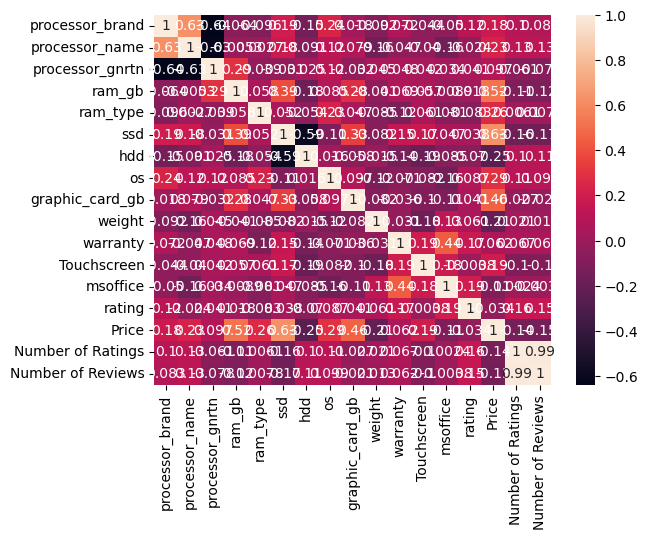

In [507]:
# Visualization
sns.heatmap(metrix,annot=True)
plt.show()

In [508]:
# preparing y(target) and x(features) for training
y = final_df["Price"]
x = final_df.drop("Price",axis=1)

In [509]:
## train and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4,
    random_state=42
)

In [510]:
## Algorithm
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [511]:
model.score(x_test,y_test)

0.6480141064534352

In [512]:
model.score(x_train,y_train)

0.7421870153612269

In [513]:
y_pred = model.predict(x_test)
y_pred

array([116085.05181947,  62607.38577418,  31148.46770854,  40896.41412975,
        69815.50233185,  71635.620003  , 139153.25996584,  63466.06746651,
        56097.01781693,  53944.21747318, 123696.67206307,  84017.89633457,
       117659.39063724,  58231.21806463,  53762.71187889,  32386.91412861,
        40937.4933653 ,  45846.38937096,  62202.77177583,  76498.07253502,
        92128.09618837,  74178.90522266,  84195.44582504,  66100.95241448,
        72239.17481301,  65959.86417566,  42933.01063251,  58026.66637434,
        41626.86291135,  29215.93366395,  73755.7593727 ,  82643.57172261,
        67974.87295551,  42680.24296946,  69104.46581205, 152417.86075879,
        50924.28545154,  39046.30161207,  83902.30301667,  25085.40033926,
        32917.21956568,  63892.48333768,  40245.40757046, 136821.04128526,
        68921.66010067,  41584.1249103 ,  58083.75454856,  59116.76110267,
        40351.81523559,  87351.54313197, 132256.73614373, 155498.41980566,
        69815.50233185,  

In [514]:
df2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2.head()

,Actual,Predicted
610,104990,116085.051819
174,41890,62607.385774
67,41998,31148.467709
168,40390,40896.414130
275,57500,69815.502332


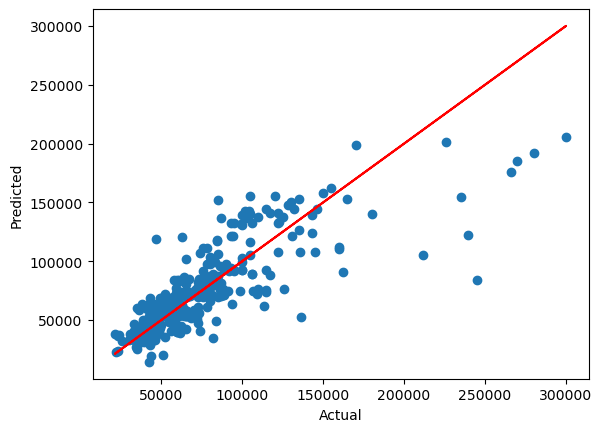

In [515]:
# ploting a graph

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot(y_test,y_test,color="red")
plt.show()